**TASK :For the iris dataset,Create a Decision Tree Classifier and vizualise it graphically.The purpose is if we feed any new data to this Classifier,it should be able to predict the right class accordingly.**


Iris dataset description:

This datset contains 150 rows and 6 different columns.

There are four features and one target variable.

Features : \
           SepalLength in Cm\
           SepalWidth in Cm\
           PetalLength in Cm\
           PetalWidth in Cm
           
Target variable: Species\
Species contains three classes:\
                               Iris-setosa\
                               Iris-versicolor\
                               Iris-virginica

In [50]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#Reading the datset
iris_data=pd.read_csv("iris.csv")

In [52]:
iris_data.head(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa


In [53]:
#Shape of the dataset
iris_data.shape

(150, 6)

In [56]:
#Dropping the first column
iris_data.drop(["Id"],axis=1,inplace=True)

In [57]:
iris_data.head(5)#checking for the removal of first column

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
#Removing and checking for missing values
iris_data_total=iris_data.isnull().sum()

iris_data_percent=((iris_data_total/(iris_data.shape[0])*100).round(2))

print("Missing values left:",iris_data.isnull().sum().sum())

Missing values left: 0


## Exploratory Data Analysis

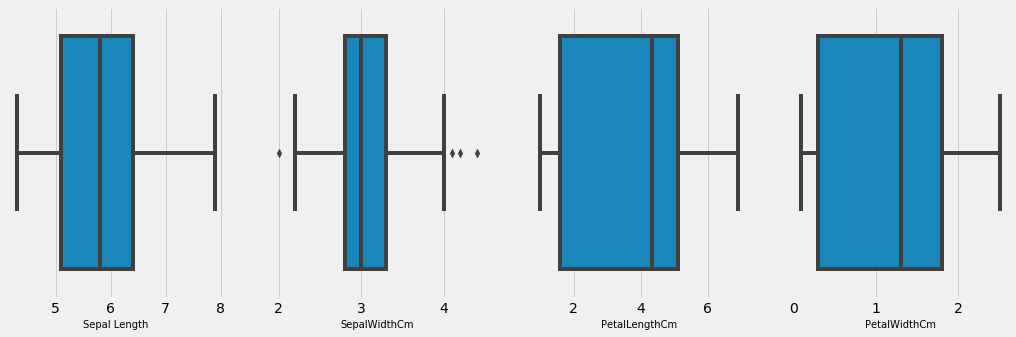

In [59]:
#Plotting the plots for understanding the features.
plt.rcParams["figure.figsize"]=(16,5)
plt.style.use("fivethirtyeight")

plt.subplot(1,4,1)
sns.boxplot(iris_data["SepalLengthCm"],)
plt.xlabel("Sepal Length",fontsize=10)

plt.subplot(1,4,2)
sns.boxplot(iris_data["SepalWidthCm"],)
plt.xlabel("SepalWidthCm",fontsize=10)

plt.subplot(1,4,3)
sns.boxplot(iris_data["PetalLengthCm"],)
plt.xlabel("PetalLengthCm",fontsize=10)

plt.subplot(1,4,4)
sns.boxplot(iris_data["PetalWidthCm"],)
plt.xlabel("PetalWidthCm",fontsize=10)

plt.show()

**As,we can see that sepal length and petal length varies.\
Sepal length is more than petal length.\
Sepal width is more than petal width.**

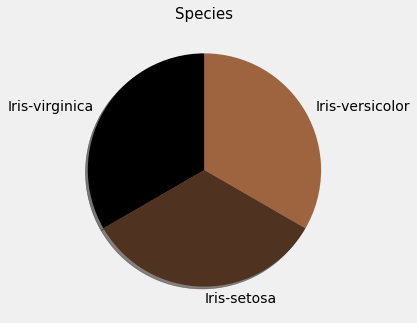

In [60]:
#Distribution of species.
plt.rcParams["figure.figsize"]=(16,5)
plt.style.use("fivethirtyeight")

labels=iris_data["Species"].value_counts().index
sizes=iris_data["Species"].value_counts()
colors=plt.cm.copper(np.linspace(0,1,5))
explode=[0,0,0]
plt.pie(sizes,labels=labels,colors=colors,explode=explode,shadow=True,startangle=90)
plt.title("Species",fontsize=15)
plt.show()

**All the species is been distributed equally**

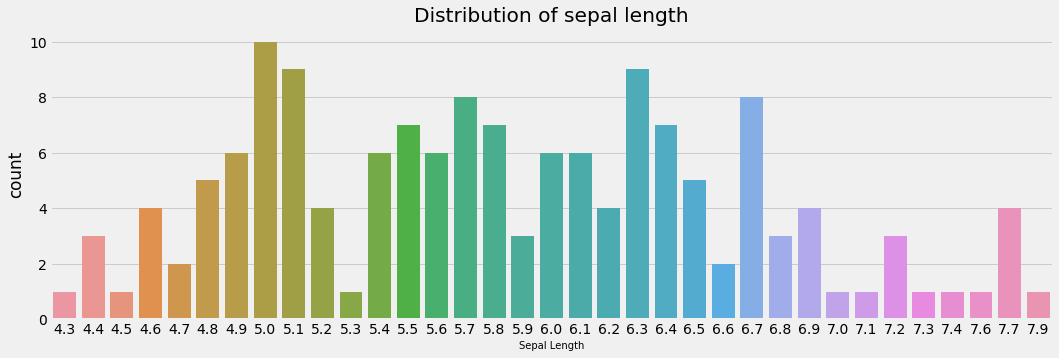

In [61]:
plt.rcParams["figure.figsize"]=(16,5)
plt.style.use("fivethirtyeight")

sns.countplot(iris_data["SepalLengthCm"],)
plt.xlabel("Sepal Length",fontsize=10)
plt.title("Distribution of sepal length")
plt.show()

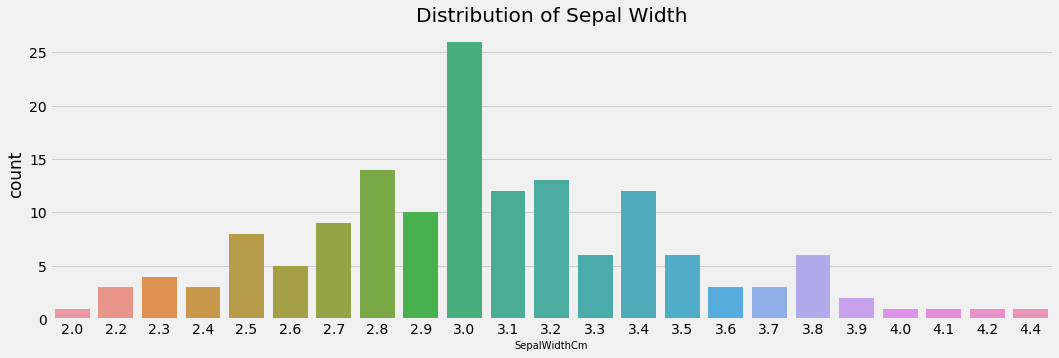

In [62]:
plt.rcParams["figure.figsize"]=(16,5)
plt.style.use("fivethirtyeight")

sns.countplot(iris_data["SepalWidthCm"],)
plt.xlabel("SepalWidthCm",fontsize=10)
plt.title("Distribution of Sepal Width")
plt.show()

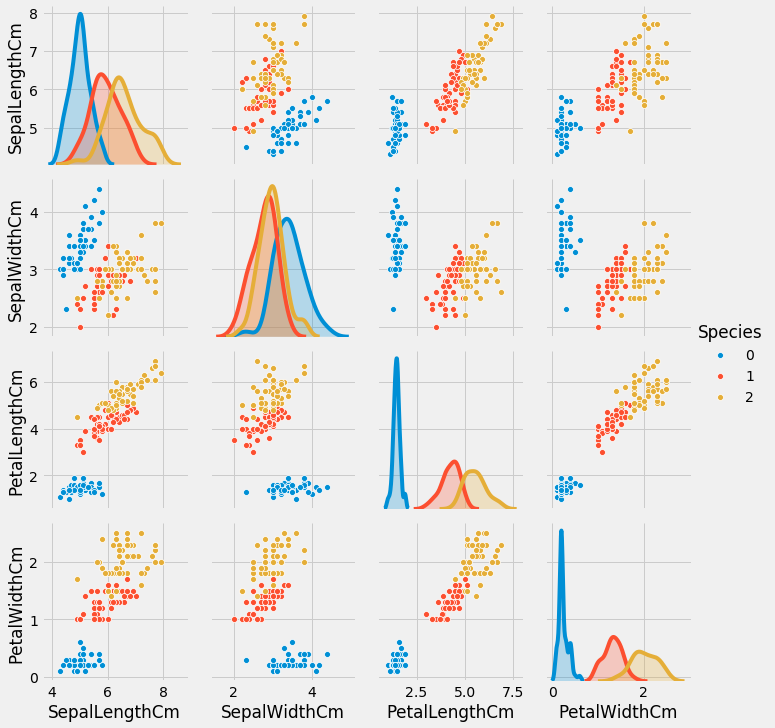

In [88]:
plt.rcParams["figure.figsize"]=(16,7)
sns.pairplot(iris_data,hue="Species")

## Creating a model

In [64]:
#Import sklearn and other required libraries.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()#label encoding is done to give the labels to species.
iris_data["Species"] = le.fit_transform(iris_data["Species"])

In [65]:
X=iris_data.drop(["Species"],axis=1)
y=iris_data["Species"]

In [66]:
print(X.head(3))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2


In [67]:
print(y.head(3))

0    0
1    0
2    0
Name: Species, dtype: int32


In [68]:
#Spliting into training and testing
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test) = train_test_split(X,y, train_size=0.7, random_state=0)

In [69]:
print("Shape of the x Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the y Test :", y_test.shape)
print("Shape of the x Test :", X_test.shape)

Shape of the x Train : (105, 4)
Shape of the y Train : (105,)
Shape of the y Test : (45,)
Shape of the x Test : (45, 4)


In [70]:
iris_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Training Accuracy : 1.0
Testing Accuracy : 0.9777777777777777


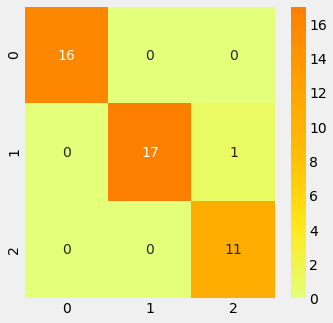

In [77]:
#Classifier algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams["figure.figsize"] = (5, 5)
sns.heatmap(cm, annot = True, cmap = "Wistia", fmt = ".8g")

In [72]:
#Classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Evaluating the model

In [74]:
new_test=np.array([[5,2.9,1,0.2]])
new_test.shape

(1, 4)

In [75]:
prediction=model.predict(new_test)
prediction

array([0])

In [76]:
iris_data["Species"][prediction]

0    0
Name: Species, dtype: int32

In [80]:
new_test1=np.array([[5.0,2.0,3.5,1.0]])
new_test1.shape
prediction1=model.predict(new_test1)
prediction1

array([1])

In [82]:
new_test2=np.array([[6.4,2.8,5.6,2.2]])
new_test2.shape
prediction2=model.predict(new_test2)
prediction2

array([2])

**array([0]) means it is iris-setosa\
array([1]) means it is iris-versicolor\
array([2]) means it is iris-virginica**